In [1]:
# instalção de bibliotecas
!pip install bs4

In [10]:
!pip install pyspark

  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=1c3255650b4feb9620ce04bcc23e59b2f0d2b989d62c78d583dc3d5723dc4a04
  Stored in directory: c:\users\renan\appdata\local\pip\cache\wheels\52\45\50\69db7b6e1da74a1b9fcc097827db9185cb8627117de852731e
Successfully built pyspark


In [11]:
from pyspark.sql import SparkSession

In [2]:
# Importando bibliotecas
from urllib.request import urlopen, urlretrieve, Request
from urllib.error import URLError, HTTPError
from bs4 import BeautifulSoup
import pandas as pd
 
# Obtendo o HTML
url = "https://www.fundamentus.com.br/resultado.php"
headers ={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36"}
 
req = Request(url,headers=headers)
response = urlopen(req)
html = response.read()
soup = BeautifulSoup(html,'html.parser')
 
# Obtendo as TAGs de interesse ( topo das informações)
lista =soup.find('table')

In [3]:
# quantidade ações
qtd = soup.findAll('span',class_='tips') 
qtd = range(int(len(qtd)-1)) #retira o ultimo registro para não ter erro
 
# Declarando variáveis cards
resumo = []

In [5]:
# pega as primeiras informações que não entram no for
papel =  lista.find('td').find('span',class_='tips').getText()
cotacao = lista.find('td').findNext('td').contents[0]
 
for i in qtd:
 
  acoes ={}
 
  PL = cotacao.findNext('td').contents[0]
  PVP = PL.findNext('td').contents[0]
  PSR = PVP.findNext('td').contents[0]
  DividendYied = PSR.findNext('td').contents[0]
  PAtivo = DividendYied.findNext('td').contents[0]
  PCapGiro = PAtivo.findNext('td').contents[0]
  PEbit= PCapGiro.findNext('td').contents[0]
  PAtivoCirc= PEbit.findNext('td').contents[0]
  EVEbit= PAtivoCirc.findNext('td').contents[0]
  EVEbita= EVEbit.findNext('td').contents[0]
  MrgEbit= EVEbita.findNext('td').contents[0]
  MrgLiq= MrgEbit.findNext('td').contents[0]
  LiqCorrente= MrgLiq.findNext('td').contents[0]
  ROIC= LiqCorrente.findNext('td').contents[0]
  ROE= ROIC.findNext('td').contents[0]
  Liq2Meses= ROE.findNext('td').contents[0]
  PatriLiquido= Liq2Meses.findNext('td').contents[0]
  DivBruta_por_Patri= PatriLiquido.findNext('td').contents[0]
  Cresc_5a= DivBruta_por_Patri.findNext('td').contents[0]
 
  acoes['id']= i
  acoes['Papel'] = papel
  acoes['Cotacao'] = cotacao
  acoes['PL'] = PL
  acoes['PVP']=PVP
  acoes['DividendYied']=DividendYied
  acoes['PAtivo']=PAtivo
  acoes['PCapGiro']=PCapGiro
  acoes['PEbit']=PEbit
  acoes['PAtivoCirc']=PAtivoCirc
  acoes['EVEbit']=EVEbit
  acoes['EVEbita']=EVEbita
  acoes['MrgEbit']=MrgEbit
  acoes['MrgLiq']=MrgLiq
  acoes['LiqCorrente']=LiqCorrente
  acoes['ROIC']=ROIC
  acoes['ROE']=ROE
  acoes['Liq2Meses']=Liq2Meses
  acoes['PatriLiquido']=PatriLiquido
  acoes['DivBruta_por_Patri']=DivBruta_por_Patri
  acoes['Cresc_5a']=Cresc_5a
 
  # Adiciona o dicionário de ações em uma lista
  resumo.append(acoes)
 
  # try retorna erro por a ultima linha não encontra o span
  try:
    papel = Cresc_5a.findNext('td').span.a.contents[0]
    cotacao = papel.findPrevious('td').findNext('td').contents[0]
 
  except HTTPError as e:
    print(e.status, e.reason)

In [6]:
# cria data frame
dataset = pd.DataFrame(resumo)
 
dataset.head(10000)

,id,Papel,Cotacao,PL,PVP,DividendYied,PAtivo,PCapGiro,PEbit,PAtivoCirc,...,EVEbita,MrgEbit,MrgLiq,LiqCorrente,ROIC,ROE,Liq2Meses,PatriLiquido,DivBruta_por_Patri,Cresc_5a
0,0,CFLU4,"1.000,00","0,00","0,00","0,00%","0,000","0,00","0,00","0,00",...,"0,00","8,88%","10,72%","1,10","17,68%","32,15%","0,00","60.351.000,00","0,06","8,14%"
1,1,PORP4,"2,40","0,00","0,00","0,00%","0,000","0,00","0,00","0,00",...,"0,00","0,00%","0,00%","0,00","0,00%","-2,08%","0,00","22.399.000,00","0,00","13,66%"
2,2,MNSA4,"0,47","0,00","0,00","0,00%","0,000","0,00","0,00","0,00",...,"0,00","-208,15%","-362,66%","3,63","-13,50%","145,70%","0,00","-9.105.000,00","-6,52","-41,11%"
3,3,CLAN3,"0,00","0,00","0,00","0,00%","0,000","0,00","0,00","0,00",...,"0,00","0,00%","0,00%","0,00","0,00%","-1,05%","0,00","1.012.240.000,00","0,00","-63,96%"
4,4,CSTB3,"150,00","0,00","0,00","0,00%","0,000","0,00","0,00","0,00",...,"0,00","40,85%","28,98%","2,60","22,40%","20,11%","0,00","8.420.670.000,00","0,14","31,91%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,980,UBBR4,"7,49","610,27","1,99","0,00%","0,000","0,00","0,00","0,00",...,"0,00","0,00%","0,00%","0,00","0,00%","0,33%","0,00","10.317.200.000,00","0,00","10,58%"
1966,981,BRIT3,"3,43","687,06","1,15","0,00%","0,533","2,19","15,52","-4,62",...,"6,29","13,62%","0,31%","2,37","5,98%","0,17%","1.590.430,00","1.342.090.000,00","0,84","54,47%"
1967,982,TRAD3,"4,30","1.008,40","1,97","0,00%","1,873","3,81","-41,95","3,86",...,"-44,29","-31,52%","1,31%","11,99","-8,80%","0,20%","10.054.800,00","613.211.000,00","0,01","0,00%"
1968,983,UBBR11,"14,75","1.201,81","3,91","0,00%","0,000","0,00","0,00","0,00",...,"0,00","0,00%","0,00%","0,00","0,00%","0,33%","0,00","10.317.200.000,00","0,00","10,58%"


In [7]:
# TRATAMENTO DE DADOS CAMPO PL  
dataset['PL'] = dataset['PL'].str.replace('.', '', regex=True).replace(',', '.', regex=True)
convert_dict = {'PL': float}
dataset['PL']  = dataset['PL'].astype(convert_dict)
 
# TRATAMENTO DE DADOS CAMPO ROE
dataset['ROE'] = dataset['ROE'].str.replace('.', '', regex=True).replace(',', '.', regex=True).replace('%', '', regex=True)
convert_dict = {'ROE': float}
dataset['ROE']  = dataset['ROE'].astype(convert_dict)/100
 
# TRATAMENTO DE DADOS CAMPO MrgLiq
dataset['MrgLiq'] = dataset['MrgLiq'].str.replace('.', '', regex=True).replace(',', '.', regex=True).replace('%', '', regex=True)
convert_dict = {'MrgLiq': float}
dataset['MrgLiq']  = dataset['MrgLiq'].astype(convert_dict)/100
 
# TRATAMENTO DE DADOS CAMPO DIVIDA BRUTA/PATRIMONIO  
dataset['DivBruta_por_Patri'] = dataset['DivBruta_por_Patri'].str.replace('.', '', regex=True).replace(',', '.', regex=True)
convert_dict = {'DivBruta_por_Patri': float}
dataset['DivBruta_por_Patri']  = dataset['DivBruta_por_Patri'].astype(convert_dict)
 
# TRATAMENTO DE DADOS CAMPO CAGER
dataset['Cresc_5a'] = dataset['Cresc_5a'].str.replace('.', '', regex=True).replace(',', '.', regex=True).replace('%', '', regex=True)
convert_dict = {'Cresc_5a': float}
dataset['Cresc_5a']  = dataset['Cresc_5a'].astype(convert_dict)/100
 
# TRATAMENTO DE DADOS DIVIDEND YIED
dataset['DividendYied'] = dataset['DividendYied'].str.replace('.', '', regex=True).replace(',', '.', regex=True).replace('%', '', regex=True)
convert_dict = {'DividendYied': float}
dataset['DividendYied']  = dataset['DividendYied'].astype(convert_dict)/100
 
# TRATAMENTO DE DADOS CAMPO ROIC
dataset['ROIC'] = dataset['ROIC'].str.replace('.', '', regex=True).replace(',', '.', regex=True).replace('%', '', regex=True)
convert_dict = {'ROIC': float}
dataset['ROIC']  = dataset['ROIC'].astype(convert_dict)/100
 
# TRATAMENTO DE DADOS CAMPO ROIC
dataset['MrgEbit'] = dataset['MrgEbit'].str.replace('.', '', regex=True).replace(',', '.', regex=True).replace('%', '', regex=True)
convert_dict = {'MrgEbit': float}
dataset['MrgEbit']  = dataset['MrgEbit'].astype(convert_dict)/100
 
# TRATAMENTO DE DADOS CAMPO PVP  
dataset['PVP'] = dataset['PVP'].str.replace('.', '', regex=True).replace(',', '.', regex=True)
convert_dict = {'PVP': float}
dataset['PVP']  = dataset['PVP'].astype(convert_dict)
 
# TRATAMENTO DE DADOS CAMPO EVEbit
dataset['EVEbit'] = dataset['EVEbit'].str.replace('.', '', regex=True).replace(',', '.', regex=True)
convert_dict = {'EVEbit': float}
dataset['EVEbit']  = dataset['EVEbit'].astype(convert_dict)
 
# TRATAMENTO DE DADOS CAMPO EVEbita
dataset['EVEbita'] = dataset['EVEbita'].str.replace('.', '', regex=True).replace(',', '.', regex=True)
convert_dict = {'EVEbita': float}
dataset['EVEbita']  = dataset['EVEbita'].astype(convert_dict)

In [8]:
# Blacklist de ações descontinuadas
blacklist ={
    'PTPA3'
}
 
#Filtragem de dados
selecao = (dataset['PL'] >= 1) & (dataset['ROE'] > 0) & (dataset['ROE'] < 90) &  (dataset['MrgLiq'] > 0) & (dataset['DivBruta_por_Patri'] > 1.3) &  (dataset['Cresc_5a'] > 0.1)
 
melhores_acoes = dataset[selecao].sort_values('PL', ascending=False)
melhores_acoes

,id,Papel,Cotacao,PL,PVP,DividendYied,PAtivo,PCapGiro,PEbit,PAtivoCirc,...,EVEbita,MrgEbit,MrgLiq,LiqCorrente,ROIC,ROE,Liq2Meses,PatriLiquido,DivBruta_por_Patri,Cresc_5a
1951,966,PRGA4,"75,00",145.27,7.20,0.0000,"1,090","12,14","21,68","-2,92",...,14.13,0.0582,0.0090,"1,24",0.0836,0.0496,"0,00","8.462.530.000,00",3.01,0.1056
966,966,PRGA4,"75,00",145.27,7.20,0.0000,"1,090","12,14","21,68","-2,92",...,14.13,0.0582,0.0090,"1,24",0.0836,0.0496,"0,00","8.462.530.000,00",3.01,0.1056
952,952,ARML3,"17,08",101.71,5.31,0.0000,"1,800","3,72","45,62","-21,74",...,0.00,0.3321,0.1490,"6,09",0.0000,0.0522,"10.773.400,00","1.112.700.000,00",1.72,2.5020
1937,952,ARML3,"17,08",101.71,5.31,0.0000,"1,800","3,72","45,62","-21,74",...,0.00,0.3321,0.1490,"6,09",0.0000,0.0522,"10.773.400,00","1.112.700.000,00",1.72,2.5020
943,943,CBEE3,"22,00",63.36,1.42,0.0000,"0,326","-3,02","5,36","-0,61",...,7.35,0.1163,0.0098,"0,69",0.0679,0.0225,"1.901,59","3.712.960.000,00",1.61,0.1113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,389,EBEN4,"17,51",1.53,0.53,0.0000,"0,095","0,76","0,88","-0,22",...,2.87,0.1203,0.0691,"1,49",0.1342,0.3461,"0,00","1.290.520.000,00",2.05,0.1140
1369,384,BRKM6,"24,30",1.39,2.46,0.0249,"0,209","1,37","0,71","-0,41",...,1.35,0.2574,0.1322,"1,56",0.3978,1.7779,"938,51","7.865.820.000,00",4.45,0.1659
384,384,BRKM6,"24,30",1.39,2.46,0.0249,"0,209","1,37","0,71","-0,41",...,1.35,0.2574,0.1322,"1,56",0.3978,1.7779,"938,51","7.865.820.000,00",4.45,0.1659
376,376,SUZA4,"13,90",1.02,0.58,0.0000,"0,020","0,11","0,15","-0,03",...,2.59,0.4022,0.2107,"2,95",0.1741,0.5644,"0,00","4.163.020.000,00",19.13,0.4388


In [12]:
# Gera uma tabela em SQL com os dados do DataFrame
## Create Pandas Frame
pd_df = melhores_acoes
## Convert into Spark DataFrame
spark_df = spark.createDataFrame(pd_df)
## Write Frame out as Table
spark_df.write.mode("overwrite").saveAsTable("tb_melhores_acoes")

NameError: name 'spark' is not defined

In [13]:
# configura visualização de dados pelo python
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(30,10))
 
plt.rc('font', family='serif', size=8)
 
area = plt.figure()

<Figure size 2160x720 with 0 Axes>

In [14]:
# gera sub áreas no gráfico
g1 = area.add_subplot(1,3,1) # 4 graficos e esse na posição 1
g2 = area.add_subplot(1,3,2) # 4 graficos e esse na posição 2
#g3 = area.add_subplot(1,3,3) # 4 graficos e esse na posição 3
#g4 = area.add_subplot(1,2,4) # 4 graficos e esse na posição 4

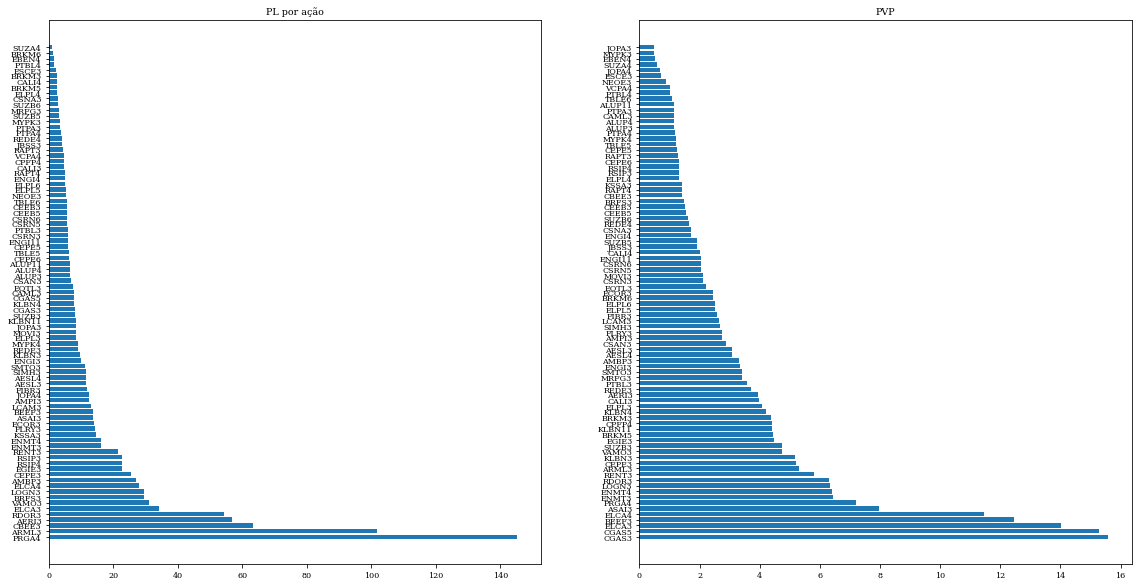

In [15]:
# cria o gráfico pelo python
dados_g1 = melhores_acoes.sort_values(by='PL', ascending=False)
g1.barh(dados_g1.Papel,dados_g1.PL)
g1.set_title('PL por ação')
 
dados_g2 = melhores_acoes.sort_values(by='PVP', ascending=False)
g2.barh(dados_g2.Papel,dados_g2.PVP)
g2.set_title('PVP')
 
area